In [1]:
import pandas as pd
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import datetime
features = pd.read_csv('features.csv',sep=";")
targets = pd.read_csv('targets.csv',sep=",")
features['StartTime'] = pd.to_datetime(features['StartTime'])
targets['StartTime'] = pd.to_datetime(targets['StartTime'])
targets = groupby_stationid(targets)

features = features.drop('CellId',axis=1)#Same as Band

seed = 6

## Initial Data Analysis

In [2]:
display(features.describe())
display(features.dtypes)

Band         PL_00         PL_01         PL_02         PL_03  \
count  23416.000000  23408.000000  23408.000000  23408.000000  23408.000000   
mean    1750.000000      0.007348      0.008587      0.036697      0.272386   
std      638.370898      0.471095      0.292840      0.821941      3.662791   
min      800.000000      0.000000      0.000000      0.000000      0.000000   
25%     1550.000000      0.000000      0.000000      0.000000      0.000000   
50%     1800.000000      0.000000      0.000000      0.000000      0.000000   
75%     2000.000000      0.000000      0.000000      0.000000      0.000000   
max     2600.000000     54.000000     24.000000     70.000000    343.000000   

              PL_04         PL_05          PL_06          PL_07  \
count  23408.000000  23408.000000   23408.000000   23408.000000   
mean       4.163619     63.712919    2030.936774    3780.167208   
std       34.805876    190.206189   14253.681192   10542.102521   
min        0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000       3.000000      65.000000   
50%        0.000000      5.000000     163.500000     580.500000   
75%        0.000000     55.000000     704.000000    4521.000000   
max     4676.000000   5460.000000  304455.000000  259539.000000   

               PL_08  ...          PL_11          PL_12          PL_13  \
count   23408.000000  ...   23408.000000   23408.000000   23408.000000   
mean     4362.281827  ...   12135.284134   16621.672078   21769.731844   
std     12021.272761  ...   23578.177793   33320.614060   37209.256762   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%       156.000000  ...     560.000000     827.000000    1850.500000   
50%       965.500000  ...    4113.500000    5269.500000    8197.000000   
75%      3930.250000  ...   13601.000000   18247.250000   25209.250000   
max    253220.000000  ...  893332.000000  891152.000000  845288.000000   

               PL_14          PL_15          PL_16          PL_17  \
count   23408.000000   23408.000000   23408.000000   23408.000000   
mean    21331.408920   12593.011834    4620.605306    3238.195403   
std     33544.185194   22067.074255    8978.773480    6448.544138   
min         0.000000       0.000000       0.000000       0.000000   
25%      2719.000000    1690.750000     639.000000     261.000000   
50%      9611.000000    5855.000000    2189.500000    1342.000000   
75%     26471.500000   15430.500000    5790.000000    4002.500000   
max    680096.000000  537181.000000  353422.000000  192341.000000   

               PL_18         PL_19         PL_20  
count   23408.000000  23408.000000  23408.000000  
mean     2295.018754    914.902597    125.312415  
std      5061.327161   2554.319416    962.292382  
min         0.000000      0.000000      0.000000  
25%       118.000000     27.000000      1.000000  
50%       717.500000    215.000000      8.000000  
75%      2520.000000    877.000000     49.000000  
max    130257.000000  90964.000000  79697.000000  

[8 rows x 22 columns]

StartTime    datetime64[ns]
Band                  int64
PL_00               float64
PL_01               float64
PL_02               float64
PL_03               float64
PL_04               float64
PL_05               float64
PL_06               float64
PL_07               float64
PL_08               float64
PL_09               float64
PL_10               float64
PL_11               float64
PL_12               float64
PL_13               float64
PL_14               float64
PL_15               float64
PL_16               float64
PL_17               float64
PL_18               float64
PL_19               float64
PL_20               float64
dtype: object

In [3]:
#Features has a smaller time window than targets

min_startTime = features['StartTime'].min()
max_startTime = features['StartTime'].max()

print(min_startTime)
print(max_startTime)

2020-08-01 00:00:00
2020-09-30 23:45:00


In [4]:
features[features['PL_00'].isna()]

StartTime  Band  PL_00  PL_01  PL_02  PL_03  PL_04  PL_05  \
15132 2020-09-09 09:45:00  2600    NaN    NaN    NaN    NaN    NaN    NaN   
15133 2020-09-09 09:45:00  1800    NaN    NaN    NaN    NaN    NaN    NaN   
15134 2020-09-09 09:45:00   800    NaN    NaN    NaN    NaN    NaN    NaN   
15135 2020-09-09 09:45:00  1800    NaN    NaN    NaN    NaN    NaN    NaN   
21168 2020-09-25 03:30:00  2600    NaN    NaN    NaN    NaN    NaN    NaN   
21169 2020-09-25 03:30:00  1800    NaN    NaN    NaN    NaN    NaN    NaN   
21170 2020-09-25 03:30:00   800    NaN    NaN    NaN    NaN    NaN    NaN   
21171 2020-09-25 03:30:00  1800    NaN    NaN    NaN    NaN    NaN    NaN   

       PL_06  PL_07  ...  PL_11  PL_12  PL_13  PL_14  PL_15  PL_16  PL_17  \
15132    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15133    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15134    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15135    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21168    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21169    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21170    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21171    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       PL_18  PL_19  PL_20  
15132    NaN    NaN    NaN  
15133    NaN    NaN    NaN  
15134    NaN    NaN    NaN  
15135    NaN    NaN    NaN  
21168    NaN    NaN    NaN  
21169    NaN    NaN    NaN  
21170    NaN    NaN    NaN  
21171    NaN    NaN    NaN  

[8 rows x 23 columns]

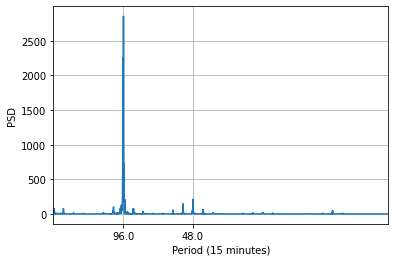

In [5]:
def computePSD(Y):
    yAC = np.correlate(Y-np.mean(Y), Y-np.mean(Y), mode='full')
    yAC = yAC/np.max(yAC) # not necessary, but scales large values
    return np.fft.fft(yAC)
  
fig = plt.figure(); 
ax = fig.add_subplot(111)
PSD = computePSD(targets['NumberOfVehicles'].to_numpy())
x_psd = np.arange(0,len(PSD))/len(PSD)
plt.plot(x_psd,np.abs(PSD))
plt.ylabel('PSD'); plt.xlabel('Period (15 minutes)'); ax.grid();
plt.xticks([1/round(1/x_psd[np.abs(PSD).argmax()]),1/48],1/np.array([1/round(1/x_psd[np.abs(PSD).argmax()]),1/48]))
plt.xlim([0,0.05])

plt.show();

The number of vehicles is periodic, with the biggest component having a frequency of a 1 day, and the second biggest component having a frequency of 1/2 day.

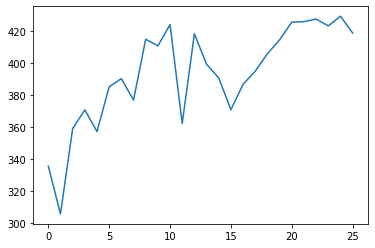

In [6]:
window_size = 96*7
first_idx = 0
last_idx = window_size-1
means = []
while last_idx <= len(targets):
    means.append(np.mean(targets['NumberOfVehicles'].values[first_idx:last_idx]))
    first_idx += window_size
    last_idx += window_size
plt.plot(means);plt.show()

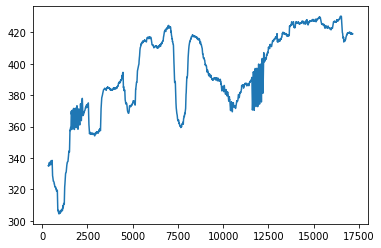

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(targets['NumberOfVehicles'], period=96*7, model='additive')
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(trend);plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(targets['NumberOfVehicles'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -29.580028
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### Preprocessing

##### Feature imputation

In [9]:
print('Targets when features where NaN')
display(targets[targets['StartTime'].isin(features[features['PL_00'].isna()]['StartTime'])])

print('Targets 15 mins before features where NaN')
display(targets[targets['StartTime'].isin(features[features['PL_00'].isna()]['StartTime']-datetime.timedelta(minutes=15))])

print('Targets 15 mins after features where NaN')
display(targets[targets['StartTime'].isin(features[features['PL_00'].isna()]['StartTime']+datetime.timedelta(minutes=15))])

Targets when features where NaN


StartTime  NumberOfVehicles
15426 2020-09-09 09:45:00               600
16937 2020-09-25 03:30:00                53

Targets 15 mins before features where NaN


StartTime  NumberOfVehicles
15425 2020-09-09 09:30:00               613
16936 2020-09-25 03:15:00                38

Targets 15 mins after features where NaN


StartTime  NumberOfVehicles
15427 2020-09-09 10:00:00               592
16938 2020-09-25 03:45:00                41

##### Since target values for the missing feature values are somewhere in between the previous and next 15 minute time intervals, let's impute the mean of the feature values for these 2 entries

In [10]:
missing_timestamps = list(features[features['PL_00'].isna()]['StartTime'])

for missing_timestamp in missing_timestamps:
    before_15 = missing_timestamp - datetime.timedelta(minutes=15)
    before_15_features = features[features['StartTime'] == before_15]
    after_15 = missing_timestamp + datetime.timedelta(minutes=15)
    after_15_features = features[features['StartTime'] == after_15]
    features.loc[features['StartTime']==missing_timestamp,1:] = (after_15_features.values[:,1:] + before_15_features.values[:,1:])/2

In [11]:
features[features['StartTime'].isin(missing_timestamps)]

StartTime    Band  PL_00  PL_01  PL_02  PL_03  PL_04  PL_05  \
15132 2020-09-09 09:45:00  2600.0    0.0    0.0    0.0    0.0    0.0    7.5   
15133 2020-09-09 09:45:00  1800.0    0.0    0.0    0.0    0.0    0.0    2.0   
15134 2020-09-09 09:45:00   800.0    0.0    0.0    0.0    1.5    7.0  162.5   
15135 2020-09-09 09:45:00  1800.0    0.0    0.0    0.0    0.0    0.0    0.5   
21168 2020-09-25 03:30:00  2600.0    0.0    0.0    0.0    0.0    0.0    0.0   
21169 2020-09-25 03:30:00  1800.0    0.0    0.0    0.0    0.0    2.5   22.0   
21170 2020-09-25 03:30:00   800.0    0.0    0.0    0.0    0.0    2.5   39.5   
21171 2020-09-25 03:30:00  1800.0    0.0    0.0    0.0    0.0    0.0    0.0   

        PL_06    PL_07  ...    PL_11    PL_12     PL_13     PL_14    PL_15  \
15132   202.5   1019.5  ...   2781.5   3063.5   53278.0   57576.5   6572.0   
15133  1355.0  10553.5  ...  89848.0  85652.5  309542.0  125600.5  15813.5   
15134   432.5    341.5  ...   5338.5   6635.5    5482.0   34873.0  15066.5   
15135   317.5   1150.0  ...   5451.0   6849.5    4829.5    3865.5   2800.0   
21168     0.0      0.0  ...      0.0      0.0       0.0       0.0      0.0   
21169  1685.0   6366.0  ...   3214.5   5141.5   11466.0   11191.0   4161.5   
21170   137.5    129.0  ...   5068.0     94.5      66.0   19657.5   1427.0   
21171     0.0      0.0  ...      0.0      0.0       0.0       0.0      0.0   

        PL_16   PL_17   PL_18   PL_19  PL_20  
15132   628.0   211.5   155.5    31.0    1.5  
15133  6336.5  4856.5  3346.0  1450.0  262.5  
15134  6609.5  9436.0  3463.5   901.5   12.0  
15135   885.5   372.5   373.0   108.5   11.0  
21168     0.0     0.0     0.0     0.0    0.0  
21169  2169.0   678.0  1124.5  1414.5   82.5  
21170   227.0   303.0   101.5     0.0    0.0  
21171     0.0     0.0     0.0     0.0    0.0  

[8 rows x 23 columns]

In [12]:
#Let's check if every timestamp is present in the feature and target data

import datetime
date = min_startTime
all_dates = [date]
while date != max_startTime:
    date = date + datetime.timedelta(minutes=15)
    all_dates.append(date)

In [13]:
all_featureStartTime = features['StartTime']
all_featureStartTime_set = [x for x in sorted(list(set(all_featureStartTime)))]

all_targetStartTime = targets['StartTime']
all_targetStartTime_set = [x for x in sorted(list(set(all_targetStartTime)))]

print("Missing feature startTime")
missing_timeStamp_features = [x for x in all_dates if x not in all_featureStartTime_set]
print(missing_timeStamp_features)

print("Missing target startTime")
missing_timeStamp_targets = [x for x in all_dates if x not in all_targetStartTime_set]

print(missing_timeStamp_targets)

Missing feature startTime
[Timestamp('2020-09-25 00:15:00'), Timestamp('2020-09-25 00:30:00')]
Missing target startTime
[Timestamp('2020-08-03 12:00:00'), Timestamp('2020-08-03 12:15:00'), Timestamp('2020-08-03 12:30:00'), Timestamp('2020-08-03 12:45:00'), Timestamp('2020-08-03 13:00:00'), Timestamp('2020-08-03 13:15:00'), Timestamp('2020-08-03 13:30:00'), Timestamp('2020-08-03 13:45:00'), Timestamp('2020-08-03 14:00:00'), Timestamp('2020-08-03 14:15:00'), Timestamp('2020-08-03 14:30:00'), Timestamp('2020-08-03 14:45:00'), Timestamp('2020-08-03 15:00:00'), Timestamp('2020-08-03 15:15:00'), Timestamp('2020-08-03 15:30:00'), Timestamp('2020-08-03 15:45:00'), Timestamp('2020-08-03 16:00:00'), Timestamp('2020-08-03 16:15:00'), Timestamp('2020-08-03 16:30:00'), Timestamp('2020-08-03 16:45:00'), Timestamp('2020-08-03 17:00:00'), Timestamp('2020-08-03 17:15:00'), Timestamp('2020-08-03 17:30:00'), Timestamp('2020-08-03 17:45:00'), Timestamp('2020-08-03 18:00:00'), Timestamp('2020-08-03 18:15:0

##### Due to the fact that our target variable is missing a big portion of 3rd of August, let's remove the 3rd of August. This shouldn't be too much of a problem due to the fact that the periodicity of the data is daily (see PSD further down in analysis)

In [14]:
targets = targets[~(targets['StartTime'].dt.date == datetime.date(2020,8,3))]
features = features[~(features['StartTime'].dt.date == datetime.date(2020,8,3))]

##### Missing feature timestamps imputation

In [15]:
#Since we have 2 consecutive timestamps with missing values, let's take the closest existing value and forward/backward fill it

missing_timestamp_1 = missing_timeStamp_features[0]
    

before_15 = missing_timestamp_1 - datetime.timedelta(minutes=15)
df_impute_1 = features[features['StartTime'] == before_15].copy()
df_impute_1['StartTime'] = missing_timestamp_1
    
missing_timestamp_2 = missing_timeStamp_features[1]

    
after_15 = missing_timestamp + datetime.timedelta(minutes=15)
df_impute_2 = features[features['StartTime'] == after_15].copy()
df_impute_2['StartTime'] = missing_timestamp_2

features = features.append(df_impute_1)
features = features.append(df_impute_2)

features = features.sort_values(['StartTime','Band'])

- The targets dataset contains three columns, the timestamp 
- StationId: inbound and outbound, these will need to be added since feature vectors can't differentiate between inbound and outbound

In [16]:
#Pre processing, groupby start Time and add together vehicle count per stationid
targets.head()

StartTime  NumberOfVehicles
0 2020-04-01 00:00:00                72
1 2020-04-01 00:15:00                62
2 2020-04-01 00:30:00                49
3 2020-04-01 00:45:00                41
4 2020-04-01 01:00:00                46

In [17]:
#We only want the targets which is within the same time frame as our features

features = features[features['StartTime'].isin(targets['StartTime'])]

targets = targets[targets['StartTime'].isin(features['StartTime'])]
targets = targets.set_index('StartTime')
features_pivot = groupby_band(features,mode='pivot_band')
features_pivot.columns = [x.replace('.0','') for x in features_pivot.columns]
features_merge = groupby_band(features,mode='aggregate_mean')
features_merge = features_merge.set_index('StartTime')

minutes_in_day = 24. * 60
minutes_merge = features_merge.index.hour * 60 + features_merge.index.minute
minutes_pivot = features_pivot.index.hour * 60 + features_pivot.index.minute

features_merge['SinTime'] = np.sin(2. * np.pi * minutes_merge / minutes_in_day)
features_merge['CosTime'] = np.cos(2. * np.pi * minutes_merge / minutes_in_day)
features_merge['isWeekend'] = (features_merge.index.weekday > 4).astype(int)

features_pivot['SinTime'] = np.sin(2. * np.pi * minutes_pivot / minutes_in_day)
features_pivot['CosTime'] = np.cos(2. * np.pi * minutes_pivot / minutes_in_day)
features_pivot['isWeekend'] = (features_pivot.index.weekday > 4).astype(int)


In [18]:
display(features_pivot.head(3))
display(features_merge.head(3))
display(targets.head(3))



PL_00|800  PL_00|1800  PL_00|2600  PL_01|800  PL_01|1800  \
StartTime                                                                       
2020-08-01 00:00:00        0.0         0.0         0.0        0.0         0.0   
2020-08-01 00:15:00        0.0         0.0         0.0        0.0         0.0   
2020-08-01 00:30:00        0.0         0.0         0.0        0.0         0.0   

                     PL_01|2600  PL_02|800  PL_02|1800  PL_02|2600  PL_03|800  \
StartTime                                                                       
2020-08-01 00:00:00         0.0        0.0         0.0         0.0        0.0   
2020-08-01 00:15:00         0.0        0.0         0.0         0.0        0.0   
2020-08-01 00:30:00         0.0        0.0         0.0         0.0        0.0   

                     ...  PL_18|2600  PL_19|800  PL_19|1800  PL_19|2600  \
StartTime            ...                                                  
2020-08-01 00:00:00  ...         2.0        1.0      8069.5        10.0   
2020-08-01 00:15:00  ...         2.0      153.0       360.0         0.0   
2020-08-01 00:30:00  ...         0.0     2282.0       159.5         0.0   

                     PL_20|800  PL_20|1800  PL_20|2600   SinTime   CosTime  \
StartTime                                                                    
2020-08-01 00:00:00        0.0       728.5         0.0  0.000000  1.000000   
2020-08-01 00:15:00       24.0         4.5         0.0  0.065403  0.997859   
2020-08-01 00:30:00      373.0         6.5         0.0  0.130526  0.991445   

                     isWeekend  
StartTime                       
2020-08-01 00:00:00          1  
2020-08-01 00:15:00          1  
2020-08-01 00:30:00          1  

[3 rows x 66 columns]

PL_00  PL_01  PL_02  PL_03  PL_04  PL_05   PL_06  \
StartTime                                                               
2020-08-01 00:00:00    0.0    0.0    0.0    0.0    0.0  19.00  123.25   
2020-08-01 00:15:00    0.0    0.0    0.0    0.0    0.0   8.25  122.00   
2020-08-01 00:30:00    0.0    0.0    0.0    0.0    0.0  33.25   84.75   

                       PL_07    PL_08    PL_09  ...    PL_14    PL_15  \
StartTime                                       ...                     
2020-08-01 00:00:00  1517.75  1267.50  1156.25  ...  11249.5  4872.50   
2020-08-01 00:15:00   936.50  1371.25  1531.50  ...   5287.0  5925.75   
2020-08-01 00:30:00  1141.00   947.25  1002.25  ...   4492.0  3812.25   

                       PL_16    PL_17    PL_18    PL_19   PL_20   SinTime  \
StartTime                                                                   
2020-08-01 00:00:00  1896.75  2369.50  5760.75  4037.50  364.25  0.000000   
2020-08-01 00:15:00  3096.25  1622.25   600.50   218.25    8.25  0.065403   
2020-08-01 00:30:00  4036.00  1607.50   446.50   650.25   96.50  0.130526   

                      CosTime  isWeekend  
StartTime                                 
2020-08-01 00:00:00  1.000000          1  
2020-08-01 00:15:00  0.997859          1  
2020-08-01 00:30:00  0.991445          1  

[3 rows x 24 columns]

NumberOfVehicles
StartTime                            
2020-08-01 00:00:00               267
2020-08-01 00:15:00               244
2020-08-01 00:30:00               223

In [19]:
X_train_merge = features_merge.loc['2020-08-01':'2020-09-13']
y_train_merge = targets[['NumberOfVehicles']].loc['2020-08-01':'2020-09-13']
#X_val_merge = features_merge.loc['2020-09-13':'2020-09-20']
#y_val_merge = targets['NumberOfVehicles'].loc['2020-09-13':'2020-09-20']
X_test_merge = features_merge.loc['2020-09-14':'2020-09-30']
y_test_merge = targets[['NumberOfVehicles']].loc['2020-09-14':'2020-09-30']

X_train_pivot = features_pivot.loc['2020-08-01':'2020-09-13']
y_train_pivot = targets[['NumberOfVehicles']].loc['2020-08-01':'2020-09-13']
#X_val_pivot = features_pivot.loc['2020-09-13':'2020-09-20']
#y_val_pivot = targets['NumberOfVehicles'].loc['2020-09-13':'2020-09-20']
X_test_pivot = features_pivot.loc['2020-09-14':'2020-09-30']
y_test_pivot = targets[['NumberOfVehicles']].loc['2020-09-14':'2020-09-30']

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc_features_merge = StandardScaler()
X_train_merge = pd.DataFrame(sc_features_merge.fit_transform(X_train_merge),columns=X_train_merge.columns,index=X_train_merge.index)
X_test_merge = pd.DataFrame(sc_features_merge.transform(X_test_merge),columns=X_test_merge.columns,index=X_test_merge.index)

sc_features_pivot = StandardScaler()
X_train_pivot = pd.DataFrame(sc_features_pivot.fit_transform(X_train_pivot),columns=X_train_pivot.columns,index=X_train_pivot.index)
X_test_pivot = pd.DataFrame(sc_features_pivot.transform(X_test_pivot),columns=X_test_pivot.columns,index=X_test_pivot.index)

sc_target = MinMaxScaler()

y_train_merge = y_train_pivot = pd.DataFrame(sc_target.fit_transform(y_train_merge.values.reshape(-1,1)), columns=y_train_merge.columns,index=y_train_merge.index)


#### Further Data Analysis

##### Feature Importance

The relationship between pathloss and distance between sensor and transceiver can be calculated using COST Hata model. https://en.wikipedia.org/wiki/COST_Hata_model#:~:text=The%20COST%20Hata%20model%20is,EU%20funded%20research%20project%20ca.

#### $$L_b = 46.3 + 33.9 log_{10}\frac{f}{MHz} - 13.82 log_{10}\frac{h_B}{m} - \alpha(h_R,f)+\big(44.9 - 6.55 log_{10}\frac{h_B}{m}\big)log_{10}\frac{d}{km}+C_m$$
#### $$log_{10}(\frac{d}{km}) =\frac{(L_b  - 46.3 - 33.9 log_{10}\frac{f}{MHz} + 13.82 log_{10}\frac{h_B}{m} + \alpha(h_R,f))-C_m}{\big(44.9 - 6.55 log_{10}\frac{h_B}{m}\big)}$$

Where 
- $L_b$ = Median path loss in dB
- $f$ = Frequency of Transmission. (MHz)
- $h_B$ = Base station antenna effective height (m)
- $d$ = Link distance (what we want)
- $h_R$ = Mobile station antenna effective height (m) 
- $\alpha(h_R,f) = 3.2(log_{10}(11.75h_R))^2 - 4.97$ : Mobile station antenna height correction factor as described in Hata model for urban areas.
- $C_m$ = 0 dB for medium cities

In [21]:
def cost_hata_distance(L,band_mhz,height_basestation,antenna_height,Cm):
    d =  1000 * 10 ** (( L - 46.3 - 33.9 * np.log10(band_mhz) + 13.82 * np.log10(height_basestation) + (3.2 * (np.log10(11.75 * antenna_height)) ** 2 - 4.97) - Cm) / (44.9 - 6.55 * np.log10(height_basestation)))
    return d

By iterating over each band and each pathloss bin, we can find which bin has a distance closest to 450 m, which is the true distance between user and receiver

In [22]:
db_dict = {
'PL_00':50,
'PL_01':55,
'PL_02':60,
'PL_03':65,
'PL_04':70,
'PL_05':75,
'PL_06':80,
'PL_07':85,
'PL_08':90,
'PL_09':95,
'PL_10':100,
'PL_11':105,
'PL_12':110,
'PL_13':115,
'PL_14':120,
'PL_15':125,
'PL_16':130,
'PL_17':135,
'PL_18':140,
'PL_19':145,
'PL_20':150,
}



In [23]:
db_dataframe=pd.DataFrame()
band_list = []
pl_l = []
d_l = []
for band in [800,1800,2600]:
    for k,v in db_dict.items():
        d = cost_hata_distance(L=v,band_mhz=band,height_basestation=37,antenna_height=1.8,Cm=0)
        pl_l.append(k)
        d_l.append(d)
        band_list.append(band)
db_dataframe['band']=band_list
db_dataframe['PL'] = pl_l
db_dataframe['distance'] = d_l


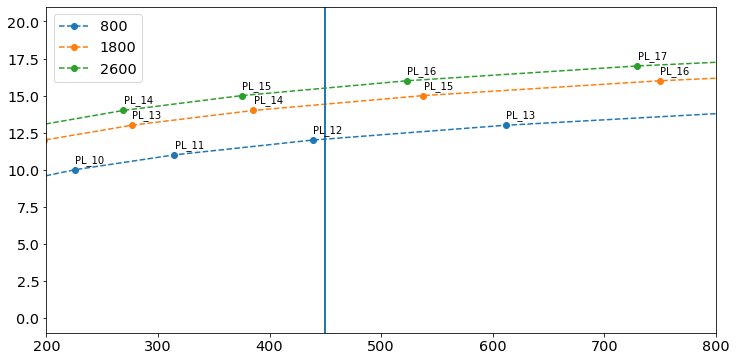

In [24]:
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 6),
         'axes.labelsize': 'x-large','xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
all_pl_cols = [x for x in features.columns if 'PL' in x]
plt.rcParams.update(params)
y = np.arange(len(all_pl_cols))
fig, axs = plt.subplots(1, 1, sharey=False ,tight_layout=False)

for band in [800,1800,2600]:
    x = db_dataframe[db_dataframe['band'] == band]['distance']
    axs.plot(x,y,'o--',label=str(band))
    axs.axvline(x=450,linestyle='-')
    axs.set_xlim(200,800)
    for i,txt in enumerate(all_pl_cols):
        x_txt = list(x)[i]
        if x_txt >= 200 and x_txt <= 800:
            axs.text(list(x)[i]+0.5, list(y)[i]+0.5, txt)

plt.legend()
plt.show();

Based on the COST Hata model, we could expect that the most valuable information lies within the features closest to the 450m line
Let's see if this if this is shared with some other methods of feature importance.

In [25]:
import heapq
x0 = 450
n_features = 6
top_n = heapq.nsmallest(n_features, db_dataframe['distance'], key=lambda x: abs(x-x0))
top_db = db_dataframe[db_dataframe['distance'].isin(top_n)]
top_db['filter features'] = top_db['PL']+'|'+top_db['band'].astype(str)
hata_top_n_features = top_db['filter features'].values
print(hata_top_n_features)

['PL_11|800' 'PL_12|800' 'PL_14|1800' 'PL_15|1800' 'PL_15|2600'
 'PL_16|2600']


/opt/anaconda3/envs/newenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
from collections import defaultdict
time_shift_df_dict = defaultdict(dict)
all_pivot_cols = [x for x in features_pivot.columns if 'PL' in x]
number_of_timesteps = 96
for col in all_pivot_cols:
    train_one_col = X_train_pivot[[col]]
    test_one_col = X_test_pivot[[col]]
    train_one_col.columns = ['t']
    test_one_col.columns = ['t']
    for t in range(1,number_of_timesteps):
        train_one_col['t-{}'.format(t)] = train_one_col['t'].shift(t)
        test_one_col['t-{}'.format(t)] = test_one_col['t'].shift(t)
    train_one_col['y'] = y_train_pivot['NumberOfVehicles']
    test_one_col['y'] = y_test_pivot['NumberOfVehicles']
    time_shift_df_dict[col]['train'] = train_one_col.iloc[number_of_timesteps:,:]
    time_shift_df_dict[col]['test'] = test_one_col.iloc[number_of_timesteps:,:]

/opt/anaconda3/envs/newenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/newenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [27]:
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_tuple_list = []
pred_dict = {}
### Predict the target variable using each column in pivoted data, let's see which column gives highest R2.
for col in all_pivot_cols:
    clf = xgb.XGBRegressor(seed=seed)
    X_train_col = time_shift_df_dict[col]['train']
    X_test_col = time_shift_df_dict[col]['test']
    y_test_col = X_test_col['y']
    X_test_col = X_test_col.drop('y',axis=1)
    y_train_col = X_train_col['y']
    X_train_col = X_train_col.drop('y',axis=1)
    clf.fit(X_train_col,y_train_col)
    predicted = clf.predict(X_test_col)
    predicted = sc_target.inverse_transform(predicted.reshape(-1,1))
    pred_dict[col] = predicted
    r2 = r2_score(y_test_col, predicted)
    r2_tuple_list.append((col,r2))

In [28]:
r2_tuple_list_sorted = sorted(r2_tuple_list,key=lambda x: x[1],reverse=True)
top_n_features_xgb = [x[0] for x in r2_tuple_list_sorted[:n_features]]
print([x for x in r2_tuple_list_sorted[:n_features]])

[('PL_10|2600', 0.8759553630317874), ('PL_17|2600', 0.8704576447792703), ('PL_09|2600', 0.8668499802688937), ('PL_18|2600', 0.8579855553988738), ('PL_15|2600', 0.8530548311532569), ('PL_08|2600', 0.8512913857099978)]


In [29]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

D = n_features
clf = xgb.XGBRegressor()

sfs1 = SFS(clf, 
           k_features=D, 
           forward=True, 
           floating=False, 
           verbose=2,
           n_jobs=-1,
           scoring='r2',
           )

sfs1.fit(X_train_pivot[all_pivot_cols],y_train_pivot,custom_feature_names=X_train_pivot[all_pivot_cols].columns)
print("Features selected are:")
print(sfs1.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    5.5s finished

[2020-12-10 13:34:54] Features: 1/6 -- score: 0.5244958499310572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.1s finished

[2020-12-10 13:35:00] Features: 2/6 -- score: 0.65054562941908[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    7.7s finished

[2020-12-10 13:35:08] Features: 3/6 -- score: 0.6718873279562934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1

Features selected are:
('PL_05|800', 'PL_10|800', 'PL_10|1800', 'PL_10|2600', 'PL_12|800', 'PL_17|2600')


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   11.2s finished

[2020-12-10 13:35:39] Features: 6/6 -- score: 0.7211137907198766

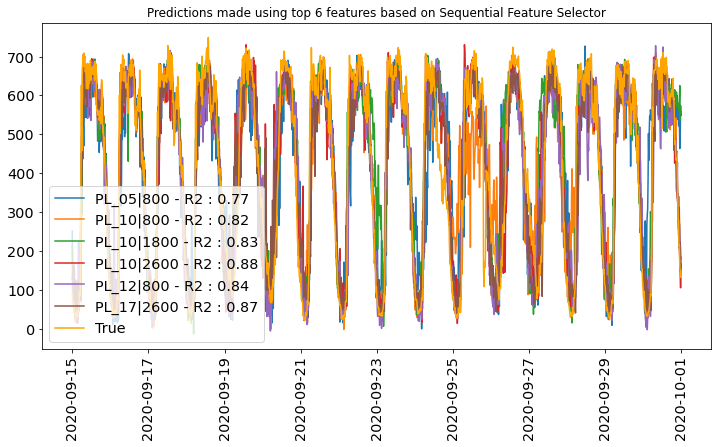

In [30]:
for top_n_feature in sfs1.k_feature_names_:
    y_df = pd.DataFrame(pred_dict[top_n_feature],index=y_test_col.index)
    plt.plot(y_df,label='{} - R2 : {:.2f}'.format(top_n_feature, r2_score(y_test_col, y_df)))
plt.plot(y_test_col,'orange',label='True')
plt.xticks(rotation=90)
plt.title('Predictions made using top {} features based on Sequential Feature Selector'.format(n_features))
plt.legend()

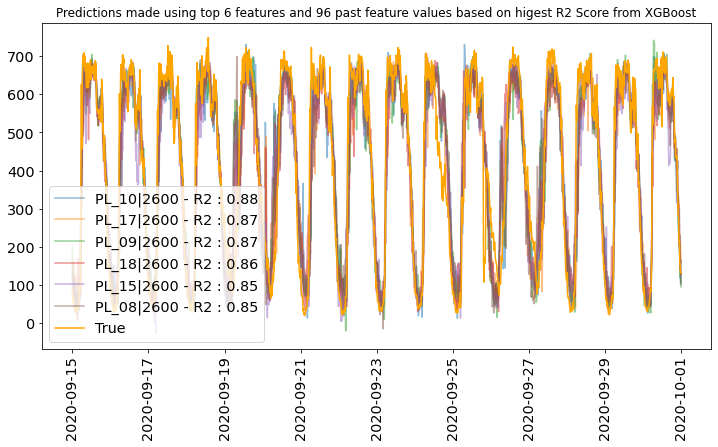

In [31]:
for top_n_feature in top_n_features_xgb:
    y_df = pd.DataFrame(pred_dict[top_n_feature],index=y_test_col.index)
    plt.plot(y_df,label='{} - R2 : {:.2f}'.format(top_n_feature, r2_score(y_test_col, y_df)),alpha=0.5)
plt.plot(y_test_col,'orange',label='True')
plt.title('Predictions made using top {} features and 96 past feature values based on higest R2 Score from XGBoost'.format(n_features))
plt.xticks(rotation=90)
plt.legend()

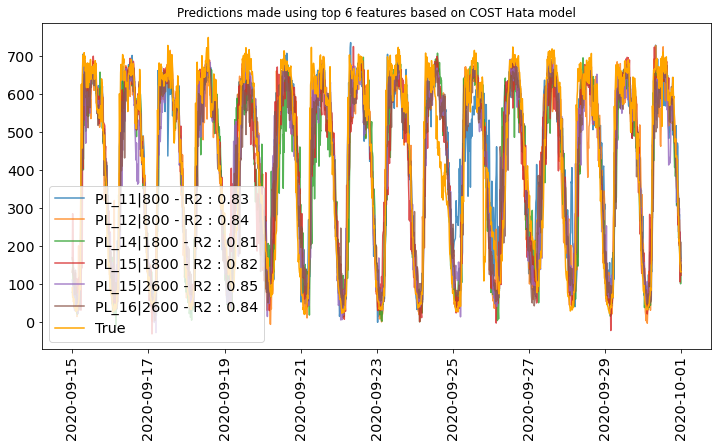

In [32]:
for top_n_feature in hata_top_n_features:
    y_df = pd.DataFrame(pred_dict[top_n_feature],index=y_test_col.index)
    plt.plot(y_df,label='{} - R2 : {:.2f}'.format(top_n_feature, r2_score(y_test_col, y_df)),alpha=0.8)
plt.plot(y_test_col,'orange',label='True')
plt.xticks(rotation=90)
plt.title('Predictions made using top {} features based on COST Hata model'.format(n_features))
plt.legend()

### Model section 1

#### Using only sensor features

*** KNeighborsRegressor ***
MAE =  135.0254901960784
MSE =  31209.011421568626
R2  =  0.4589684431128813
*** XGBRegressor  ***
MAE =  114.85887311592552
MSE =  22157.319427488655
R2  =  0.615886294366422
*** LR  ***
MAE =  164.36767219897843
MSE =  36654.81202125221
R2  =  0.3645614163363976


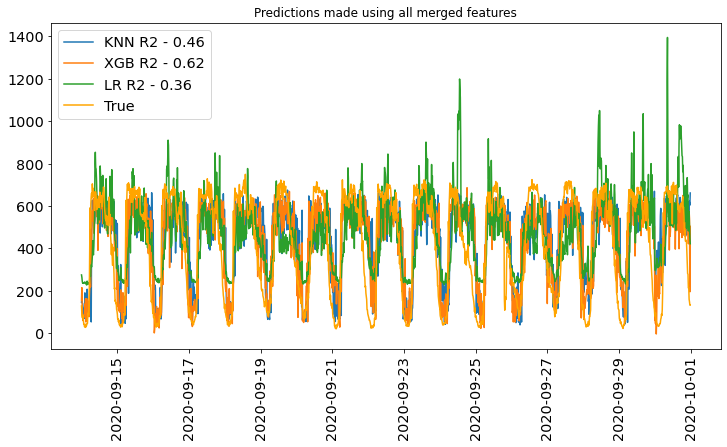

In [33]:
#Using all merged features
from sklearn.linear_model import LinearRegression

knn_merged = KNeighborsRegressor(5) #Tuned from Armins notebook
xgb_merged = xgb.XGBRegressor(seed=seed)
lr_merged = LinearRegression()

all_piv_cols_merge = [x for x in X_train_merge.columns if 'PL' in x]

knn_merged.fit(X_train_merge[all_piv_cols_merge],y_train_merge)
xgb_merged.fit(X_train_merge[all_piv_cols_merge],y_train_merge)
lr_merged.fit(X_train_merge[all_piv_cols_merge],y_train_merge)

pred_merge_knn = sc_target.inverse_transform(knn_merged.predict(X_test_merge[all_piv_cols_merge]).reshape(-1,1))
pred_merge_xgb = sc_target.inverse_transform(xgb_merged.predict(X_test_merge[all_piv_cols_merge]).reshape(-1,1))
pred_merge_lr = sc_target.inverse_transform(lr_merged.predict(X_test_merge[all_piv_cols_merge]).reshape(-1,1))


print('*** KNeighborsRegressor ***')
print('MAE = ', mean_absolute_error(y_test_merge, pred_merge_knn))
print('MSE = ', mean_squared_error(y_test_merge, pred_merge_knn))
print('R2  = ', r2_score(y_test_merge, pred_merge_knn))

print('*** XGBRegressor  ***')
print('MAE = ', mean_absolute_error(y_test_merge, pred_merge_xgb))
print('MSE = ', mean_squared_error(y_test_merge, pred_merge_xgb))
print('R2  = ', r2_score(y_test_merge, pred_merge_xgb))

print('*** LR  ***')
print('MAE = ', mean_absolute_error(y_test_merge, pred_merge_lr))
print('MSE = ', mean_squared_error(y_test_merge, pred_merge_lr))
print('R2  = ', r2_score(y_test_merge, pred_merge_lr))

pred_df = pd.DataFrame(pred_merge_knn,index=y_test_merge.index)
plt.plot(pred_df,label='KNN R2 - {:.2f}'.format(r2_score(y_test_merge, pred_merge_knn)))
pred_df = pd.DataFrame(pred_merge_xgb,index=y_test_merge.index)
plt.plot(pred_df,label='XGB R2 - {:.2f}'.format(r2_score(y_test_merge, pred_merge_xgb)))
pred_df = pd.DataFrame(pred_merge_lr,index=y_test_merge.index)
plt.plot(pred_df,label='LR R2 - {:.2f}'.format(r2_score(y_test_merge, pred_merge_lr)))
plt.plot(y_test_merge,'orange',label='True')

plt.title('Predictions made using all merged features')
plt.xticks(rotation=90)
plt.legend()

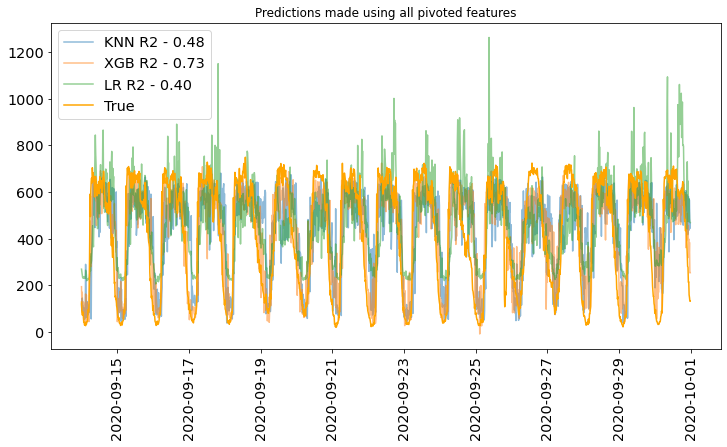

In [34]:
#Using all pivoted features 
from sklearn.linear_model import LinearRegression

knn_pivoted = KNeighborsRegressor(5) #Tuned from Armins notebook
xgb_pivoted = xgb.XGBRegressor(seed=seed)
lr_pivoted = LinearRegression()

all_pl_cols_pivot =[x for x in X_train_pivot if 'PL' in x]

knn_pivoted.fit(X_train_pivot[all_pl_cols_pivot],y_train_pivot)
xgb_pivoted.fit(X_train_pivot[all_pl_cols_pivot],y_train_pivot)
lr_pivoted.fit(X_train_pivot[all_pl_cols_pivot],y_train_pivot)

pred_pivot_knn = sc_target.inverse_transform(knn_pivoted.predict(X_test_pivot[all_pl_cols_pivot]).reshape(-1,1))
pred_pivot_xgb = sc_target.inverse_transform(xgb_pivoted.predict(X_test_pivot[all_pl_cols_pivot]).reshape(-1,1))
pred_pivot_lr = sc_target.inverse_transform(lr_pivoted.predict(X_test_pivot[all_pl_cols_pivot]).reshape(-1,1))

pred_df = pd.DataFrame(pred_pivot_knn,index=y_test_pivot.index)
plt.plot(pred_df,label='KNN R2 - {:.2f}'.format(r2_score(y_test_pivot, pred_pivot_knn)),alpha=0.5)
pred_df = pd.DataFrame(pred_pivot_xgb,index=y_test_pivot.index)
plt.plot(pred_df,label='XGB R2 - {:.2f}'.format(r2_score(y_test_pivot, pred_pivot_xgb)),alpha=0.5)
pred_df = pd.DataFrame(pred_pivot_lr,index=y_test_pivot.index)
plt.plot(pred_df,label='LR R2 - {:.2f}'.format(r2_score(y_test_pivot, pred_pivot_lr)),alpha=0.5)
plt.plot(y_test_pivot,'orange',label='True')

plt.title('Predictions made using all pivoted features')
plt.xticks(rotation=90)
plt.legend()

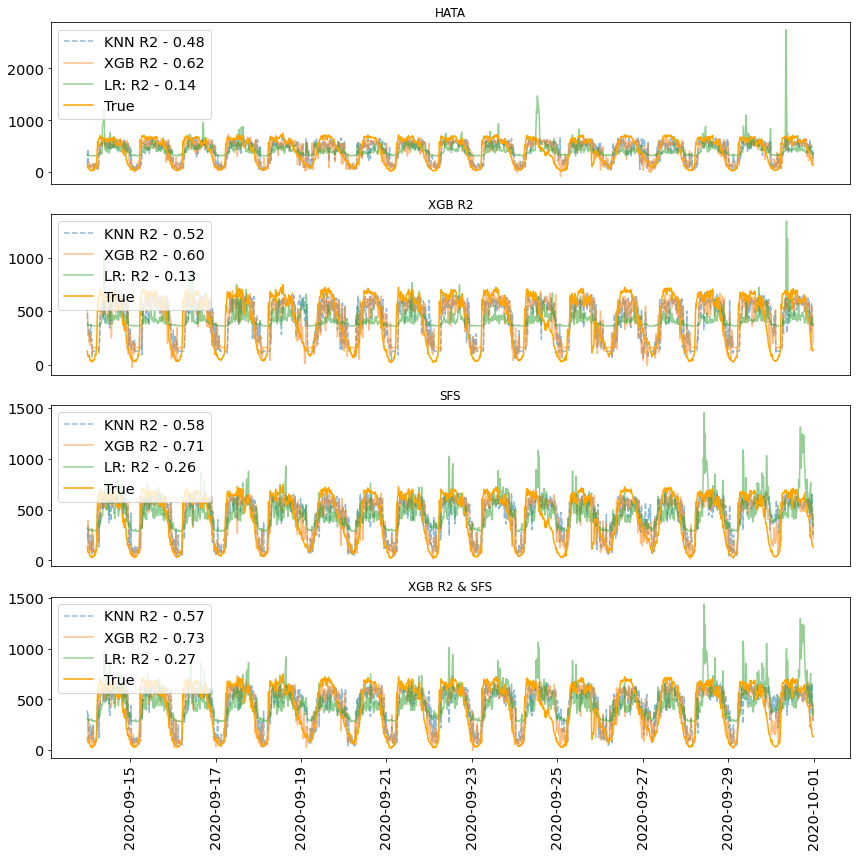

In [35]:
#Using all various feature importance techniques 
from sklearn.linear_model import LinearRegression

params = {'legend.fontsize': 'x-large','figure.figsize': (12, 12),
         'axes.labelsize': 'x-large','xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

knn_pivoted = KNeighborsRegressor(5) #Tuned from Armins notebook
xgb_pivoted = xgb.XGBRegressor(seed=seed)
lr_pivoted = LinearRegression()

d = {'HATA':list(hata_top_n_features),'XGB R2':list(top_n_features_xgb),'SFS':list(sfs1.k_feature_names_),'XGB R2 & SFS': list(set(list(top_n_features_xgb)+list(sfs1.k_feature_names_)))}
fig, axs = plt.subplots(len(d.keys()), 1, sharey=False, tight_layout=True)

j = 0
for s,features in d.items():
    knn_pivoted.fit(X_train_pivot[features],y_train_pivot)
    xgb_pivoted.fit(X_train_pivot[features],y_train_pivot)
    lr_pivoted.fit(X_train_pivot[features],y_train_pivot)

    pred_pivot_knn_subset = sc_target.inverse_transform(knn_pivoted.predict(X_test_pivot[features]).reshape(-1,1))
    pred_pivot_knn_subset = pd.DataFrame(pred_pivot_knn_subset,index=y_test_pivot.index)
    pred_pivot_xgb_subset = sc_target.inverse_transform(xgb_pivoted.predict(X_test_pivot[features]).reshape(-1,1))
    pred_pivot_xgb_subset = pd.DataFrame(pred_pivot_xgb_subset,index=y_test_pivot.index)
    pred_pivot_lr_subset = sc_target.inverse_transform(lr_pivoted.predict(X_test_pivot[features]).reshape(-1,1))
    pred_pivot_lr_subset = pd.DataFrame(pred_pivot_lr_subset,index=y_test_pivot.index)
    
    axs[j].set_title(s)
    axs[j].plot(pred_pivot_knn_subset,'--',alpha=0.5,label='KNN R2 - {:.2f}'.format(r2_score(y_test_pivot, pred_pivot_knn_subset)))
    axs[j].plot(pred_pivot_xgb_subset,alpha=0.5,label='XGB R2 - {:.2f}'.format(r2_score(y_test_pivot, pred_pivot_xgb_subset)))
    axs[j].plot(pred_pivot_lr_subset,alpha=0.5,label='LR: R2 - {:.2f}'.format(r2_score(y_test_pivot, pred_pivot_lr_subset)))
    axs[j].plot(y_test_pivot,'orange',label='True')
    axs[j].legend(loc='upper left')
    if j != len(d.keys())-1:
        axs[j].set_xticks([])
    else:
        axs[j].tick_params(axis='x', labelrotation=90)
    j = j+1


Let's try, for each set of selected features, create an ensmeble model where each model is trained individually on a single feature and the prediction is the mean of each model's prediction

Let's change the objective function to count:poisson, since we are dealing with counting vehicles over time

In [36]:
from functools import partial
from itertools import repeat
def nested_defaultdict(default_factory, depth=1):
    result = partial(defaultdict, default_factory)
    for _ in repeat(None, depth - 1):
        result = partial(defaultdict, result)
    return result()

In [37]:
#Ensemble model of 96 past values for each selected feature
model_d = nested_defaultdict(str,4)

for s,features_l in d.items():
    j = 0
    for feature in features_l:
        X_train_col = time_shift_df_dict[feature]['train']
        X_test_col = time_shift_df_dict[feature]['test']
        y_test_col = X_test_col['y']
        X_test_col = X_test_col.drop('y',axis=1)
        y_train_col = X_train_col['y']
        X_train_col = X_train_col.drop('y',axis=1)        
        model_d['knn'][s][j]['model'] = KNeighborsRegressor(5); model_d['knn'][s][j]['model'].fit(X_train_col,y_train_col)
        model_d['knn'][s][j]['predictions'] = sc_target.inverse_transform(model_d['knn'][s][j]['model'].predict(X_test_col).reshape(-1,1))
        model_d['xgb'][s][j]['model'] = xgb.XGBRegressor(seed=seed,objective='count:poisson'); model_d['xgb'][s][j]['model'].fit(X_train_col,y_train_col)
        model_d['xgb'][s][j]['predictions'] = sc_target.inverse_transform(model_d['xgb'][s][j]['model'].predict(X_test_col).reshape(-1,1))
        j = j + 1

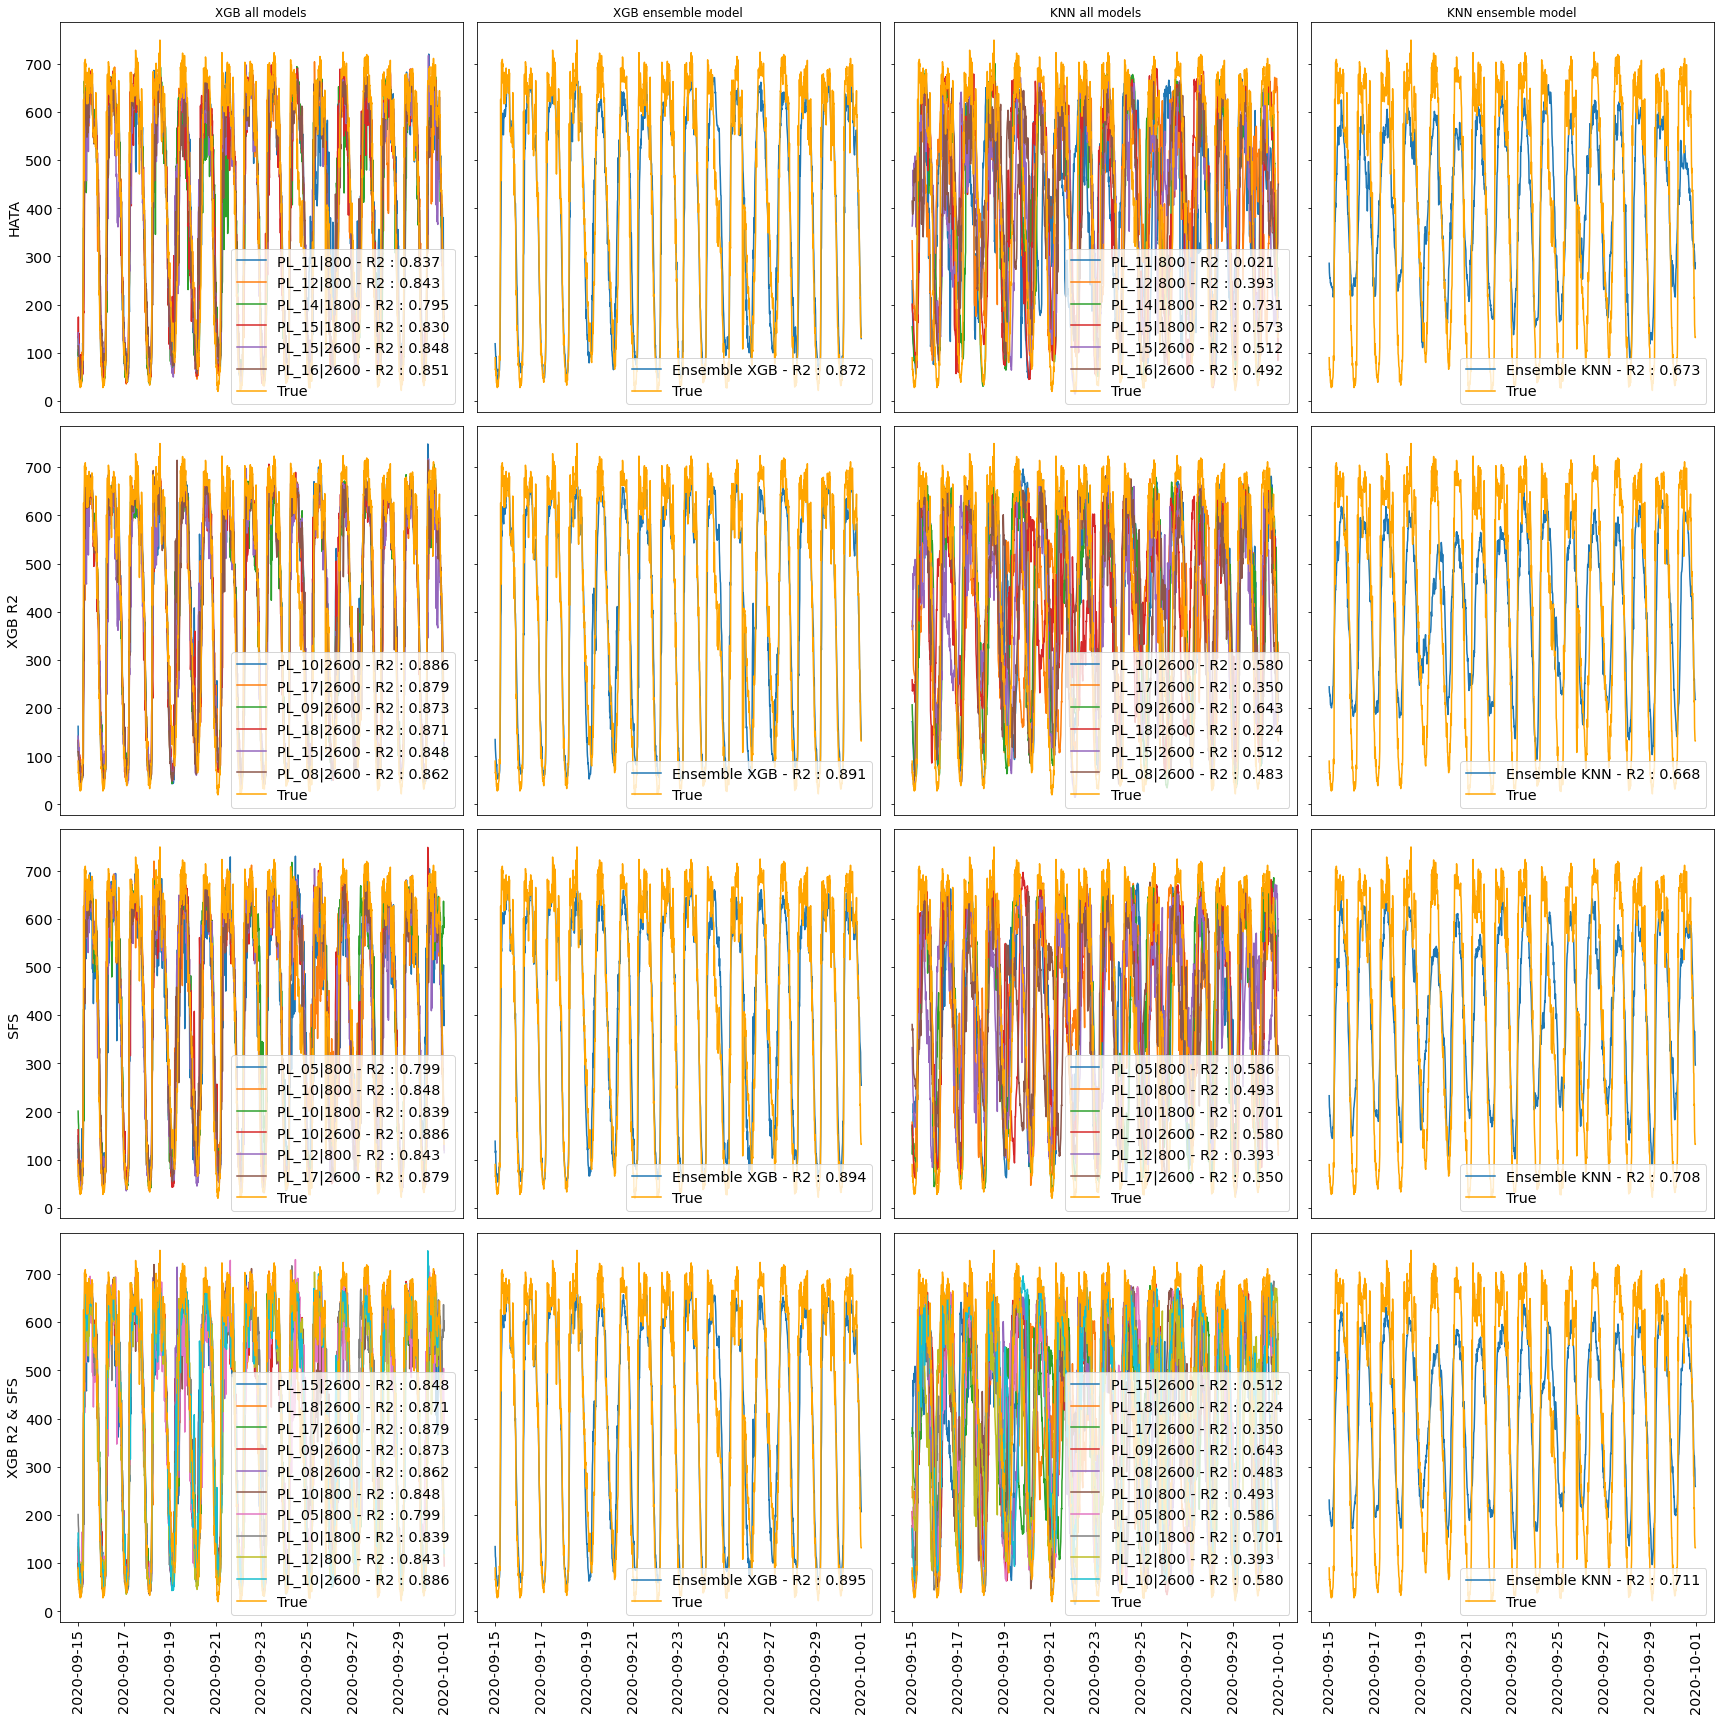

In [38]:
params = {'legend.fontsize': 'x-large','figure.figsize': (24, 24),
         'axes.labelsize': 'x-large','xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


fig, axs = plt.subplots(len(d.keys()), 4, sharey=True, tight_layout=True)

feature_set_sel = 0
for s,features_l in d.items():
    knn_preds = np.array([model_d['knn'][s][j]['predictions'].flatten() for j in range(len(features_l))])
    knn_mean_preds = np.mean(knn_preds,axis=0)
    knn_mean_preds = pd.DataFrame(knn_mean_preds,index=y_test_pivot[number_of_timesteps:].index)
    xgb_preds = np.array([model_d['xgb'][s][j]['predictions'].flatten() for j in range(len(features_l))])
    xgb_mean_preds = np.mean(xgb_preds,axis=0)
    xgb_mean_preds = pd.DataFrame(xgb_mean_preds,index=y_test_pivot[number_of_timesteps:].index)
    #Plot ensemble knn
    axs[feature_set_sel][3].plot(knn_mean_preds,label='Ensemble KNN - R2 : {:.3f}'.format(r2_score(y_test_pivot[number_of_timesteps:], knn_mean_preds)))
    #Plot ensemble xgb
    axs[feature_set_sel][1].plot(xgb_mean_preds,label='Ensemble XGB - R2 : {:.3f}'.format(r2_score(y_test_pivot[number_of_timesteps:], xgb_mean_preds)))
    
    #Plot each model
    for j in range(len(features_l)):
        knn_pred = knn_preds[j]
        knn_pred = pd.DataFrame(knn_pred,index=y_test_pivot[number_of_timesteps:].index)
        axs[feature_set_sel][2].plot(knn_pred,label='{} - R2 : {:.3f}'.format(features_l[j],r2_score(y_test_pivot[number_of_timesteps:], knn_pred)))
        xgb_pred = xgb_preds[j]
        xgb_pred = pd.DataFrame(xgb_pred,index=y_test_pivot[number_of_timesteps:].index)
        axs[feature_set_sel][0].plot(xgb_pred,label='{} - R2 : {:.3f}'.format(features_l[j],r2_score(y_test_pivot[number_of_timesteps:], xgb_pred)))
        
    axs[feature_set_sel][0].plot(y_test_pivot[number_of_timesteps:],'orange',label='True');axs[feature_set_sel][1].plot(y_test_pivot[number_of_timesteps:],'orange',label='True')
    axs[feature_set_sel][2].plot(y_test_pivot[number_of_timesteps:],'orange',label='True');axs[feature_set_sel][3].plot(y_test_pivot[number_of_timesteps:],'orange',label='True')

    if feature_set_sel != len(d.keys())-1:
        axs[feature_set_sel][0].set_xticks([]);axs[feature_set_sel][1].set_xticks([]);axs[feature_set_sel][2].set_xticks([]);axs[feature_set_sel][3].set_xticks([])
    else:
        axs[feature_set_sel][0].tick_params(axis='x', labelrotation=90);axs[feature_set_sel][1].tick_params(axis='x', labelrotation=90)
        axs[feature_set_sel][2].tick_params(axis='x', labelrotation=90);axs[feature_set_sel][3].tick_params(axis='x', labelrotation=90)

    axs[feature_set_sel][0].set_ylabel(s)
    feature_set_sel += 1
    
axs[0][0].set_title('XGB all models');axs[0][1].set_title('XGB ensemble model');axs[0][2].set_title('KNN all models');axs[0][3].set_title('KNN ensemble model')
for ax in axs.reshape(-1):
  ax.legend(loc='lower right')


Let's add some time features as well to see how much it improves

Let's try with only "isWeekend" first


In [39]:
params = {'legend.fontsize': 'x-large','figure.figsize': (16, 16),
         'axes.labelsize': 'x-large','xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

model_d_2 = nested_defaultdict(str,4)

for s,features_l in d.items():
    j = 0
    for feature in features_l:
        X_train_col = time_shift_df_dict[feature]['train']
        X_test_col = time_shift_df_dict[feature]['test']
        y_test_col = X_test_col['y']
        X_test_col = X_test_col.drop('y',axis=1)
        y_train_col = X_train_col['y']
        X_train_col = X_train_col.drop('y',axis=1)
        
        X_train_col = X_train_col.merge(X_train_pivot[['isWeekend']],how='left',left_index=True,right_index=True)        
        X_test_col = X_test_col.merge(X_test_pivot[['isWeekend']],how='left',left_index=True,right_index=True)
        
        model_d_2['xgb'][s][j]['model'] = xgb.XGBRegressor(objective='count:poisson',seed=seed); model_d_2['xgb'][s][j]['model'].fit(X_train_col,y_train_col)
        model_d_2['xgb'][s][j]['predictions'] = sc_target.inverse_transform(model_d_2['xgb'][s][j]['model'].predict(X_test_col).reshape(-1,1))
        j = j + 1

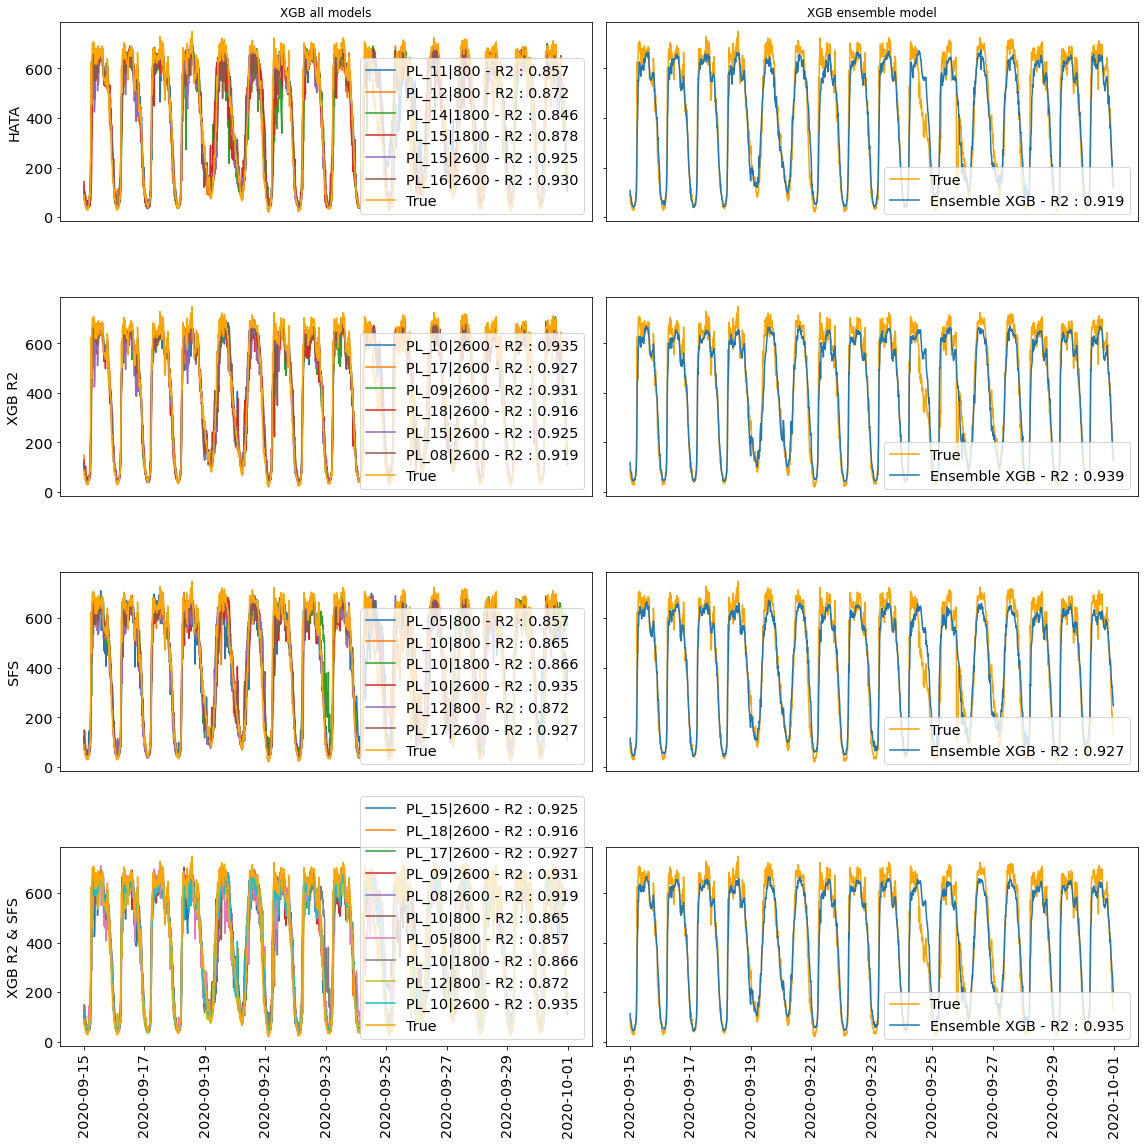

In [40]:

fig, axs = plt.subplots(len(d.keys()), 2, sharey=True, tight_layout=True)
feature_set_sel = 0
for s,features_l in d.items():
    xgb_preds = np.array([model_d_2['xgb'][s][j]['predictions'].flatten() for j in range(len(features_l))])
    xgb_mean_preds = np.mean(xgb_preds,axis=0)
    xgb_mean_preds = pd.DataFrame(xgb_mean_preds,index=y_test_pivot[number_of_timesteps:].index)

    for j in range(len(features_l)):
        xgb_pred = xgb_preds[j]
        xgb_pred = pd.DataFrame(xgb_pred,index=y_test_pivot[number_of_timesteps:].index)
        axs[feature_set_sel][0].plot(xgb_pred,label='{} - R2 : {:.3f}'.format(features_l[j],r2_score(y_test_pivot[number_of_timesteps:], xgb_pred)))
        
    axs[feature_set_sel][0].plot(y_test_pivot[number_of_timesteps:],'orange',label='True');axs[feature_set_sel][1].plot(y_test_pivot[number_of_timesteps:],'orange',label='True')
    axs[feature_set_sel][1].plot(xgb_mean_preds,label='Ensemble XGB - R2 : {:.3f}'.format(r2_score(y_test_pivot[number_of_timesteps:], xgb_mean_preds)))
    if feature_set_sel != len(d.keys())-1:
        axs[feature_set_sel][0].set_xticks([]);axs[feature_set_sel][1].set_xticks([])
    else:
        axs[feature_set_sel][0].tick_params(axis='x', labelrotation=90);axs[feature_set_sel][1].tick_params(axis='x', labelrotation=90)

    axs[feature_set_sel][0].set_ylabel(s)
    feature_set_sel += 1
    
axs[0][0].set_title('XGB all models');axs[0][1].set_title('XGB ensemble model');axs[0][1]
for ax in axs.reshape(-1):
  ax.legend(loc='lower right')

Let's try with cyclic time features as well

In [41]:
model_d_3 = nested_defaultdict(str,4)
for s,features_l in d.items():
    j = 0
    for feature in features_l:
        X_train_col = time_shift_df_dict[feature]['train']
        X_test_col = time_shift_df_dict[feature]['test']
        y_test_col = X_test_col['y']
        X_test_col = X_test_col.drop('y',axis=1)
        y_train_col = X_train_col['y']
        X_train_col = X_train_col.drop('y',axis=1)
        
        X_train_col = X_train_col.merge(X_train_pivot[['isWeekend','CosTime','SinTime']],how='left',left_index=True,right_index=True)        
        X_test_col = X_test_col.merge(X_test_pivot[['isWeekend','CosTime','SinTime']],how='left',left_index=True,right_index=True)
        
        model_d_3['xgb'][s][j]['model'] = xgb.XGBRegressor(objective='count:poisson',seed=seed); model_d_3['xgb'][s][j]['model'].fit(X_train_col,y_train_col)
        model_d_3['xgb'][s][j]['predictions'] = sc_target.inverse_transform(model_d_3['xgb'][s][j]['model'].predict(X_test_col).reshape(-1,1))
        j = j + 1

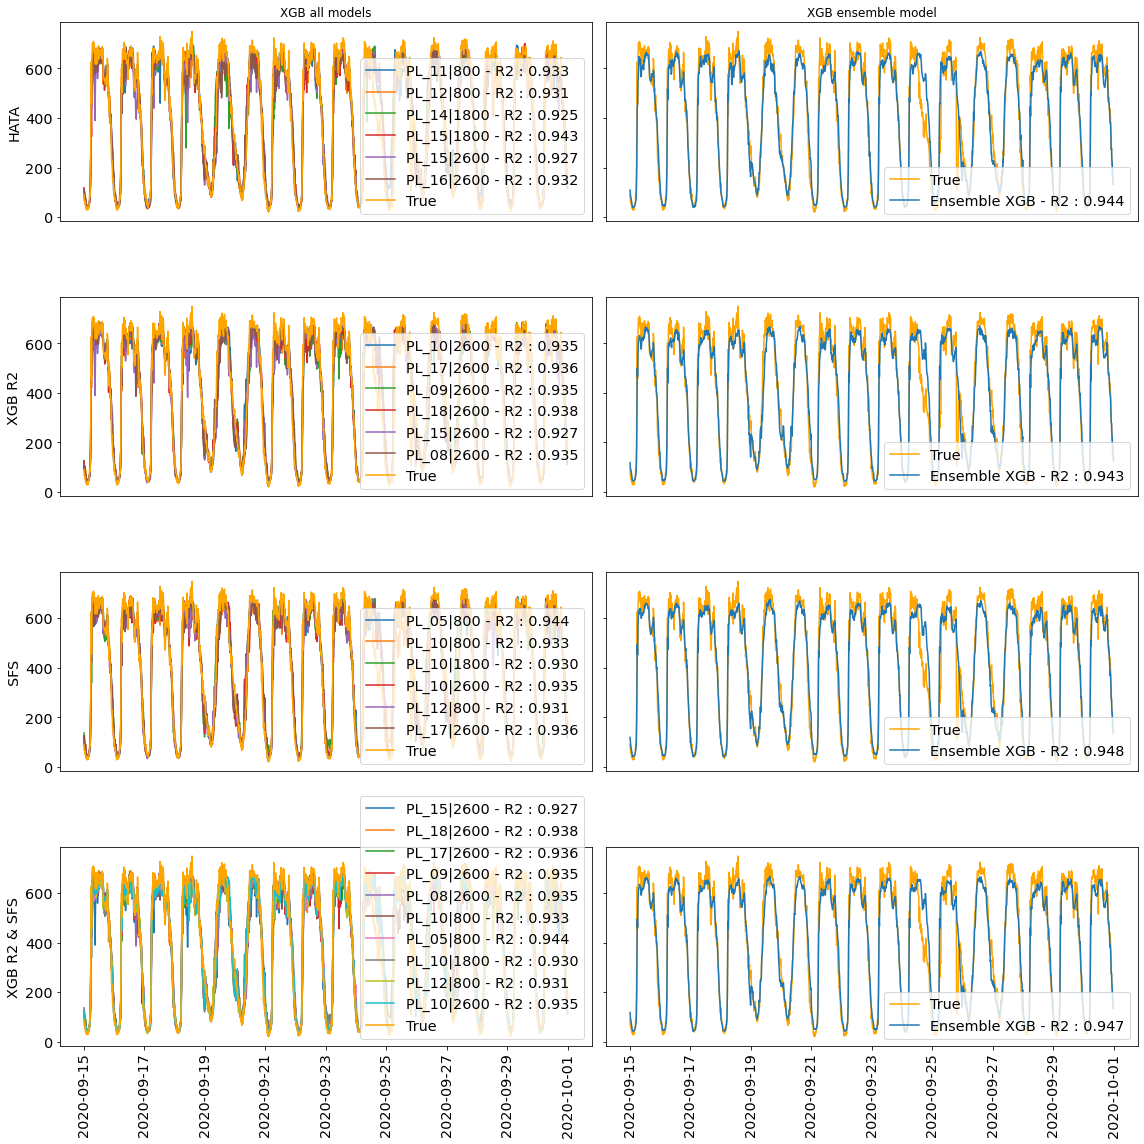

In [42]:
fig, axs = plt.subplots(len(d.keys()), 2, sharey=True, tight_layout=True)
feature_set_sel = 0

for s,features_l in d.items():
    xgb_preds = np.array([model_d_3['xgb'][s][j]['predictions'].flatten() for j in range(len(features_l))])
    xgb_mean_preds = np.mean(xgb_preds,axis=0)
    xgb_mean_preds = pd.DataFrame(xgb_mean_preds,index=y_test_pivot[number_of_timesteps:].index)

    for j in range(len(features_l)):
        xgb_pred = xgb_preds[j]
        xgb_pred = pd.DataFrame(xgb_pred,index=y_test_pivot[number_of_timesteps:].index)
        axs[feature_set_sel][0].plot(xgb_pred,label='{} - R2 : {:.3f}'.format(features_l[j],r2_score(y_test_pivot[number_of_timesteps:], xgb_pred)))
        
    axs[feature_set_sel][0].plot(y_test_pivot[number_of_timesteps:],'orange',label='True');axs[feature_set_sel][1].plot(y_test_pivot[number_of_timesteps:],'orange',label='True')
    axs[feature_set_sel][1].plot(xgb_mean_preds,label='Ensemble XGB - R2 : {:.3f}'.format(r2_score(y_test_pivot[number_of_timesteps:], xgb_mean_preds)))
    if feature_set_sel != len(d.keys())-1:
        axs[feature_set_sel][0].set_xticks([]);axs[feature_set_sel][1].set_xticks([])
    else:
        axs[feature_set_sel][0].tick_params(axis='x', labelrotation=90);axs[feature_set_sel][1].tick_params(axis='x', labelrotation=90)

    axs[feature_set_sel][0].set_ylabel(s)
    feature_set_sel += 1
    
axs[0][0].set_title('XGB all models');axs[0][1].set_title('XGB ensemble model');axs[0][1]
for ax in axs.reshape(-1):
  ax.legend(loc='lower right')

In [43]:
model_d_4 = nested_defaultdict(str,4)

for s,features_l in d.items():
    j = 0
    for feature in features_l:
        X_train_col = time_shift_df_dict[feature]['train']
        X_test_col = time_shift_df_dict[feature]['test']
        y_test_col = X_test_col['y']
        X_test_col = X_test_col.drop('y',axis=1)
        y_train_col = X_train_col['y']
        X_train_col = X_train_col.drop('y',axis=1)
        X_train_col = X_train_col.merge(X_train_pivot[['isWeekend']],how='left',left_index=True,right_index=True)        
        X_test_col = X_test_col.merge(X_test_pivot[['isWeekend']],how='left',left_index=True,right_index=True)
        model_d_4['xgb'][s][j]['model'] = xgb.XGBRegressor(seed=seed,max_depth=8,learning_rate=0.1,objective='count:poisson'); model_d_4['xgb'][s][j]['model'].fit(X_train_col,y_train_col)
        model_d_4['xgb'][s][j]['predictions'] = sc_target.inverse_transform(model_d_4['xgb'][s][j]['model'].predict(X_test_col).reshape(-1,1))
        j = j + 1
        
        
X_train_col = X_train_col.merge(X_train_pivot[['CosTime','SinTime']],how='left',left_index=True,right_index=True)        
X_train_time = X_train_col[['SinTime','CosTime','isWeekend']]

X_test_col = X_test_col.merge(X_test_pivot[['CosTime','SinTime']],how='left',left_index=True,right_index=True)
X_test_time = X_test_col[['SinTime','CosTime','isWeekend']]


model_d_4['xgb_time']['model'] = xgb.XGBRegressor(objective='count:poisson',seed=seed); model_d_4['xgb_time']['model'].fit(X_train_time,y_train_col)
model_d_4['xgb_time']['predictions'] = sc_target.inverse_transform(model_d_4['xgb_time']['model'].predict(X_test_time).reshape(-1,1))

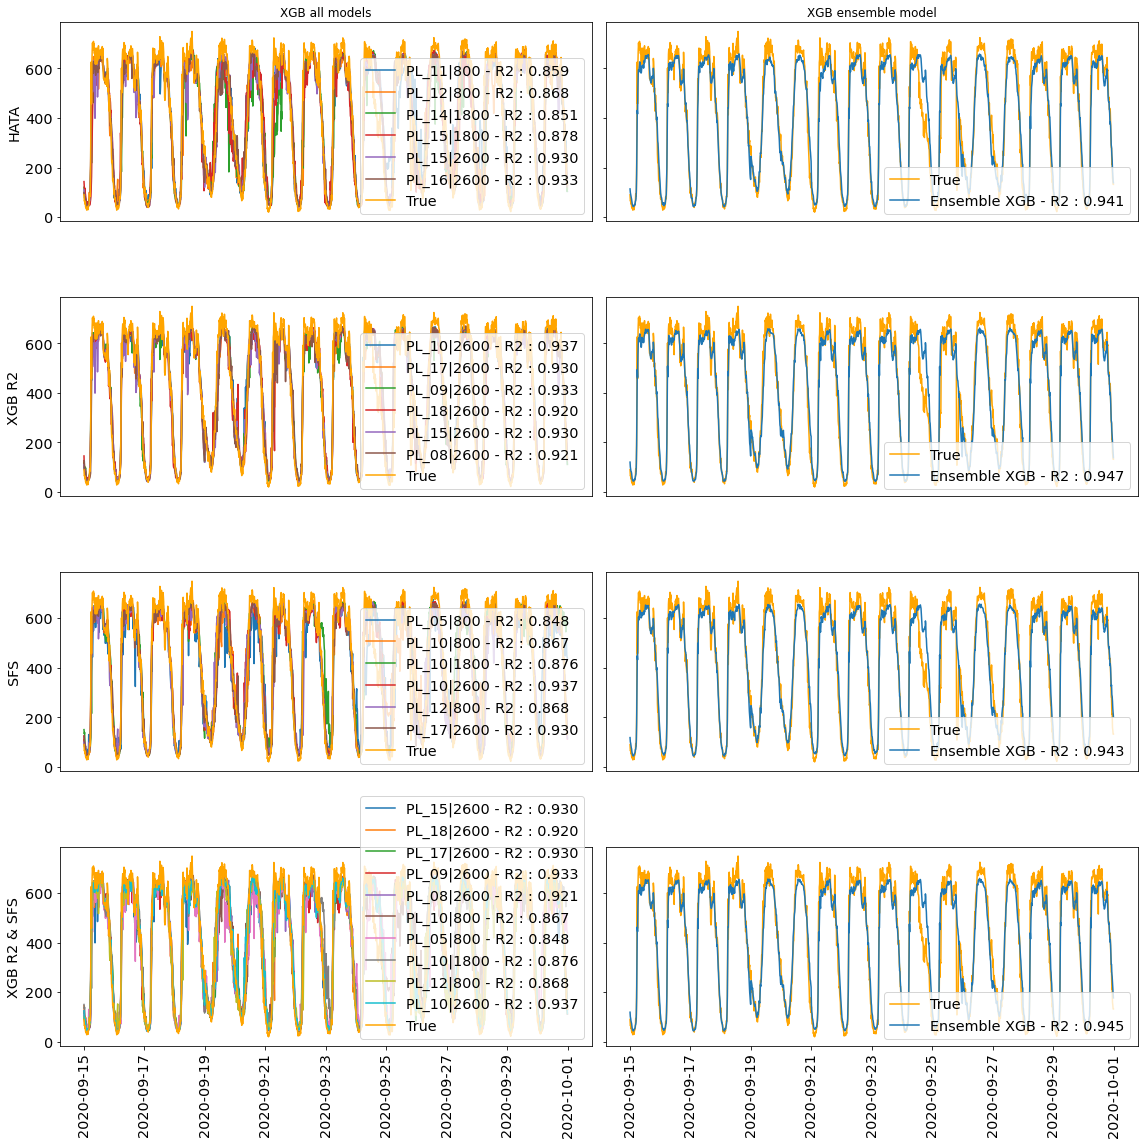

In [44]:
fig, axs = plt.subplots(len(d.keys()), 2, sharey=True, tight_layout=True)
feature_set_sel = 0

time_preds = model_d_4['xgb_time']['predictions'].flatten()
for s,features_l in d.items():
    xgb_preds = np.array([model_d_4['xgb'][s][j]['predictions'].flatten() for j in range(len(features_l))])
    xgb_mean_preds = np.mean(xgb_preds,axis=0)
    xgb_mean_preds = (time_preds+xgb_mean_preds)/2
    xgb_mean_preds = pd.DataFrame(xgb_mean_preds,index=y_test_pivot[number_of_timesteps:].index)
    
    for j in range(len(features_l)):
        xgb_pred = xgb_preds[j]
        xgb_pred = pd.DataFrame(xgb_pred,index=y_test_pivot[number_of_timesteps:].index)
        axs[feature_set_sel][0].plot(xgb_pred,label='{} - R2 : {:.3f}'.format(features_l[j],r2_score(y_test_pivot[number_of_timesteps:], xgb_pred)))
        
    axs[feature_set_sel][0].plot(y_test_pivot[number_of_timesteps:],'orange',label='True');axs[feature_set_sel][1].plot(y_test_pivot[number_of_timesteps:],'orange',label='True')
    axs[feature_set_sel][1].plot(xgb_mean_preds,label='Ensemble XGB - R2 : {:.3f}'.format(r2_score(y_test_pivot[number_of_timesteps:], xgb_mean_preds)))
    
    if feature_set_sel != len(d.keys()) - 1:
        axs[feature_set_sel][0].set_xticks([]);axs[feature_set_sel][1].set_xticks([])
    else:
        axs[feature_set_sel][0].tick_params(axis='x', labelrotation=90);axs[feature_set_sel][1].tick_params(axis='x', labelrotation=90)

    axs[feature_set_sel][0].set_ylabel(s)
    feature_set_sel += 1
    
axs[0][0].set_title('XGB all models');axs[0][1].set_title('XGB ensemble model');axs[0][1]
for ax in axs.reshape(-1):
  ax.legend(loc='lower right')

### LSTM 

In [45]:
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout,Bidirectional
from tensorflow.keras import Model,Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

X_train_lstm = []
y_train_lstm = []
X_test_lstm = []
y_test_lstm = []

features = list(top_n_features_xgb)

for i in range(number_of_timesteps,len(X_train_pivot[features])):
    X_train_lstm.append(X_train_pivot[features].values[i-number_of_timesteps:i,:])
    y_train_lstm.append(y_train_pivot.values[i])

for i in range(number_of_timesteps,len(X_test_pivot)):
    X_test_lstm.append(X_test_pivot[features].values[i-number_of_timesteps:i,:])
    y_test_lstm.append(y_test_pivot.values[i])
    
X_train_lstm = np.array(X_train_lstm)
y_train_lstm = np.array(y_train_lstm)
X_test_lstm = np.array(X_test_lstm)
y_test_lstm = np.array(y_test_lstm)

print('X train shape')
print(X_train_lstm.shape)
print('X test shape')
print(X_test_lstm.shape)
print('y train shape')
print(y_train_lstm.shape)
print('y test shape')
print(y_test_lstm.shape)


Using TensorFlow backend.


X train shape
(4032, 96, 6)
X test shape
(1536, 96, 6)
y train shape
(4032, 1)
y test shape
(1536, 1)


In [52]:
model_1 = Sequential()
model_1.add(Bidirectional(LSTM(units=32, return_sequences=True), input_shape=(number_of_timesteps, n_features)))
model_1.add(Dense(units=1))
model_1.compile(loss='mean_squared_error', optimizer=Adam())
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 96, 32)            2944      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 16)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 5,585
Trainable params: 5,585
Non-trainable params: 0
_________________________________________________________________


In [53]:
batch_size=32
epochs = 30
history = model_1.fit(X_train_lstm,y_train_lstm,epochs=epochs,batch_size=batch_size)

Epoch 1/30
126/126 [==============================] - 9s 71ms/step - loss: 0.0827
Epoch 2/30
126/126 [==============================] - 8s 64ms/step - loss: 0.0230
Epoch 3/30
126/126 [==============================] - 8s 64ms/step - loss: 0.0196
Epoch 4/30
126/126 [==============================] - 8s 64ms/step - loss: 0.0176
Epoch 5/30
126/126 [==============================] - 8s 63ms/step - loss: 0.0163
Epoch 6/30
126/126 [==============================] - 8s 63ms/step - loss: 0.0154
Epoch 7/30
126/126 [==============================] - 8s 63ms/step - loss: 0.0142
Epoch 8/30
126/126 [==============================] - 8s 62ms/step - loss: 0.0132
Epoch 9/30
126/126 [==============================] - 8s 63ms/step - loss: 0.0118
Epoch 10/30
126/126 [==============================] - 8s 62ms/step - loss: 0.0101
Epoch 11/30
126/126 [==============================] - 8s 66ms/step - loss: 0.0110
Epoch 12/30
126/126 [==============================] - 8s 64ms/step - loss: 0.0087
Epoch 13/30
1

In [54]:
predicted = model_1.predict(X_test_lstm)
predicted = sc_target.inverse_transform(predicted)

print('*** LSTM Network***')
print('MAE = ', mean_absolute_error(y_test_lstm, predicted))
print('MSE = ', mean_squared_error(y_test_lstm, predicted))
print('R2  = ', r2_score(y_test_lstm, predicted))

*** LSTM Network***
MAE =  80.04966195090674
MSE =  13290.05323163492
R2  =  0.7696725170541153
